# Figures for the preprint `https://arxiv.org/pdf/2205.13628.pdf` by E.B. Holm, T. Tram and S. Hannestad

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
# The textwidth should be that of your TeX document, in pts (points).
# To get it, place
#   \showthe\textwidth
# inside your TeX document, recompile and search the logs.
# To grab it directly, compile your document using
#   pdflatex -interaction=nonstopmode document.tex | grep '>.*pt\.'
textwidth = 440  # JCAP uses a textwidth of 440 pts
height = 2
width = textwidth/72.27
fontsize = 11/1.2

latex_preamble = r'''
    \usepackage{lmodern}
    \usepackage{amsmath}
    \usepackage{amsfonts}
    \usepackage{mathtools}
    \usepackage{siunitx}
'''
matplotlib.rcParams.update({
    'text.usetex'        : True,
    'font.family'        : 'serif',
    'font.serif'         : 'cmr10',
    'font.size'          : fontsize,
    'mathtext.fontset'   : 'cm',
    'text.latex.preamble': latex_preamble,
})

In [3]:
h_P = 6.62606896e-34 # Planck constant J s
k_B = 1.3806504e-23 # Boltzmann constant J/K
eV = 1.602176487e-19 # 1 eV in Joule
c = 2.99792458e+8 # light speed in m/s
Gyr = 60*60*24*365*1e+9 # Gyr in seconds
Mpc = 3.086e+22 # Mpc in meters
NewtonG = 6.67428e-11 # m^3/kg/s^2 
s_class = c/Mpc # seconds in CLASS units 
T_cmb = 2.7254
km_over_Mpc = 1/3.085677581282e+19
c = 2.99792458e+8
k_B = 1.38065e-23
G = 6.67428e-11
eV = 1.602e-19 # 1 eV in Joule
hbar = 1.054e-34

LCDM_settings = {
          '100*theta_s':1.042143,
          'omega_b':0.02238280,
          'omega_cdm':0.1201075,
          'N_eff':3.046,
          'background_method':0,
          
          'YHe':0.2454006,
          'tau_reio':0.05430842,
          
          'n_s':0.9660499,
          'A_s':2.100549e-09,
         }
LCDM = Class(LCDM_settings).compute()
lcdm = LCDM.get_background()
a_lcdm = 1/(1 + lcdm['z'])

# Section 1: Introduction

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/1169643709.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(2,1, figsize=[width, 1.5*height])
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/1169643709.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax[0].set(xscale='log', yscale='linear', ylabel=r'$\Delta H/H_{\Lambda\mathrm{CDM}}$')
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/1169643709.py:75: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax[1].set(xscale='log', yscale='linear', ylabel=r'$\Delta H/H_{\Lambda\mathrm{CDM}}$')
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/1169643709.py:78: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax[1].set(xscale='log

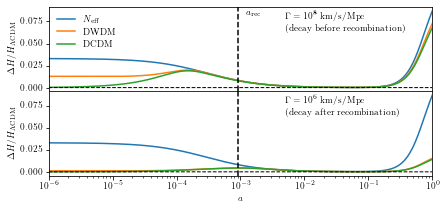

In [4]:
omega_ini = 0.0256 # Such that dNeff = 0.5
omega_dncdmdr = 2.808e-6 # Such that dNeff = 0.5
q_size = 20
m = 10
Gamma1 = 1e+8
Gamma2 = 1e+6
dncdm_settings = {
    'N_ncdm_decay_dr'                 : 1,
    'omega_dncdmdr'                   : omega_dncdmdr,
    'm_ncdm_decay_dr'                 : m,
    'Gamma_ncdm_decay_dr'             : Gamma1,
    'quadrature_strategy_ncdm_decay_dr': 3,
    'N_momentum_bins_ncdm_decay_dr'   : q_size,
    'maximum_q_ncdm_decay_dr'         : 15
}

neff = Class(LCDM_settings | {'N_eff':3.546}).get_background()
DWDM = Class(LCDM_settings | dncdm_settings).compute()
dwdm = DWDM.get_background()
dcdm = Class(LCDM_settings | {'Gamma_dcdm':Gamma1,'Omega_dcdmdr':omega_dncdmdr/DWDM.h()/DWDM.h()}).get_background()

from scipy.interpolate import interp1d
a_rec_lcdm = 1/(1+LCDM.get_current_derived_parameters(['z_rec'])['z_rec'])
H_lcdm_at_a = interp1d(a_lcdm, lcdm['H [1/Mpc]'])
labels, dHs = [], []
bglist = [neff, dwdm, dcdm]

for i, bg in enumerate(bglist):
    alist = 1/(bg['z'] + 1)
    dH = bg['H [1/Mpc]']/H_lcdm_at_a(alist) - 1
    dHs.append(dH)
    if i == 1:
        labels.append("DWDM")
    elif i == 0:
        labels.append(r"$N_{\mathrm{eff}}$")
    elif i == 2:
        labels.append("DCDM")
    
fig, ax = plt.subplots(2,1, figsize=[width, 1.5*height])
for i, dH in enumerate(dHs):
    ax[0].plot(1/(1 + bglist[i]['z']), dH, label=labels[i])
ax[0].plot(a_lcdm, np.zeros(len(a_lcdm)), 'k--', linewidth=1)
ax[0].axvline(x=a_rec_lcdm, color='k', linestyle='--')
ax[0].text(1.2e-3, 0.082, r"$a_{\mathrm{rec}}$")
ax[0].text(5e-3, 0.078, r"$\Gamma = 10^8$ km/s/Mpc")
ax[0].text(5e-3, 0.065, r"(decay before recombination)")
ax[0].set(xscale='log', yscale='linear', ylabel=r'$\Delta H/H_{\Lambda\mathrm{CDM}}$')
ax[0].set(xlim=[1e-6, 1])
ax[0].legend(frameon=False, loc='upper left')
ax[0].set(xticks=[])

dncdm_settings['Gamma_ncdm_decay_dr'] = Gamma2
DWDM = Class(LCDM_settings | dncdm_settings).compute()
dwdm = DWDM.get_background()
dcdm = Class(LCDM_settings | {'Gamma_dcdm':Gamma2,'Omega_dcdmdr':omega_dncdmdr/DWDM.h()/DWDM.h()}).get_background()
labels, dHs = [], []
bglist = [neff, dwdm, dcdm]
for i, bg in enumerate(bglist):
    alist = 1/(bg['z'] + 1)
    dH = bg['H [1/Mpc]']/H_lcdm_at_a(alist) - 1
    dHs.append(dH)
    if i == 1:
        labels.append("DWDM")
    elif i == 0:
        labels.append(r"$N_{\mathrm{eff}}$")
    elif i == 2:
        labels.append("DCDM")
for i, dH in enumerate(dHs):
    ax[1].plot(1/(1 + bglist[i]['z']), dH, label=labels[i])
ax[1].plot(a_lcdm, np.zeros(len(a_lcdm)), 'k--', linewidth=1)
ax[1].axvline(x=a_rec_lcdm, color='k', linestyle='--')
ax[1].text(5e-3, 0.078, r"$\Gamma = 10^6$ km/s/Mpc")
ax[1].text(5e-3, 0.065, r"(decay after recombination)")
#ax[1].text(1.2e-3, 0.082, r"$a_{\mathrm{rec}}$")
ax[1].set(xscale='log', yscale='linear', ylabel=r'$\Delta H/H_{\Lambda\mathrm{CDM}}$')
ax[1].set(xlim=[1e-6, 1])
#ax[1].legend(frameon=False, loc='upper left')
ax[1].set(xscale='log', yscale='linear', xlabel='$a$', ylabel=r'$\Delta H/H_{\Lambda\mathrm{CDM}}$')
fig.subplots_adjust(wspace=0.2, hspace=0, left=0.1, right=0.975, bottom=0.12, top=0.9)

#fig.savefig("fig1_hubble_models.pdf")

# Section 3: Numerical setup

## Background

In [5]:
omega_dncdmdr = 2.808e-6 # Such that dNeff = 0.5
q_size = 20
m = 10

dncdm_settings = {
    'N_ncdm_decay_dr'                 : 1,
    'omega_dncdmdr'                   : omega_dncdmdr,
    'm_ncdm_decay_dr'                 : m,
    'Gamma_ncdm_decay_dr'             : 1e+8,
    'quadrature_strategy_ncdm_decay_dr': 3,
    'N_momentum_bins_ncdm_decay_dr'   : q_size,
    'maximum_q_ncdm_decay_dr'         : 15
}
DWDM = Class(LCDM_settings | dncdm_settings)
background, ncdm_module = DWDM.get_background(), DWDM.get_ncdm()
alist = 1/(1 + background['z'])

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/4161317828.py:15: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(len(masses),1, figsize=[width, 2*height], sharex=True)


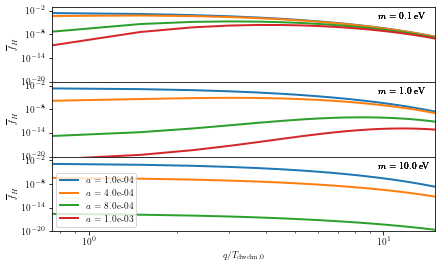

In [6]:
masses      = [0.1, 1.0, 10.0]
a_plot_list = [1e-4, 4e-4, 8e-4, 1e-3]

plot_indices = [np.argmin(np.abs(alist - a_plot_list[k])) for k in range(len(a_plot_list))]
q_list, f_dncdm = [], []
for idx_m, mass in enumerate(masses):
    run = Class(LCDM_settings | dncdm_settings | {'m_ncdm_decay_dr': mass})
    q_list.append([ncdm_module[f'q[0][{idx}]'] for idx in range(q_size)])
    f = []
    for idx in plot_indices:
        new_f = [run.get_background()[f'lnf_dncdm[0][{idx_q}]'][idx] for idx_q in range(q_size)]
        f.append(np.exp(new_f))
    f_dncdm.append(f)

fig, ax = plt.subplots(len(masses),1, figsize=[width, 2*height], sharex=True)
for m_idx, mass in enumerate(masses):
    for a_idx, plot_idx in enumerate(plot_indices):
        f_plot = np.array(f_dncdm[m_idx][a_idx])
        ax[m_idx].set(ylabel=r'$\overline{f}_{H}$', xscale='log', yscale='log', xlim=[min(q_list[m_idx]), max(q_list[m_idx])], ylim=[1e-20, 1e-1])
        ax[m_idx].plot(q_list[m_idx], f_plot, '-', linewidth=2, label=fr"$a =$ {a_plot_list[a_idx]:.1e}")
        ax[m_idx].text(9.6, 1e-4, fr"$m=$ {mass} eV")
ax[-1].set(xlabel=r'$q/T_{\mathrm{dwdm},0}$')
ax[2].legend(frameon=True);
fig.subplots_adjust(-1,0,1,1,0,0)
fig.subplots_adjust(wspace=0.2, hspace=0, left=0.1, right=0.975, bottom=0.12, top=0.9)
# fig.savefig('fig3_distributions.pdf')

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/3538411259.py:24: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1,1, figsize=[width,height])


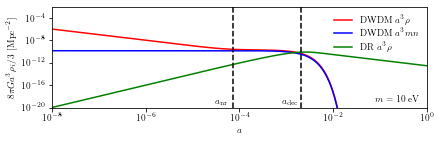

In [7]:
mass = 10
Gamma = 1e+6
dncdm_settings = {
    'N_ncdm_decay_dr'                 : 1,
    'omega_dncdmdr'                   : omega_dncdmdr,
    'm_ncdm_decay_dr'                 : mass,
    'Gamma_ncdm_decay_dr'             : Gamma,
    'quadrature_strategy_ncdm_decay_dr': 3,
    'N_momentum_bins_ncdm_decay_dr'   : q_size,
    'maximum_q_ncdm_decay_dr'         : 15
}
DWDM = Class(LCDM_settings | dncdm_settings)
background, ncdm_module = DWDM.get_background(), DWDM.get_ncdm()
rho_dwdm    = background['(.)rho_ncdm[0]']
number_dwdm = background['(.)number_ncdm[0]']
rho_dr      = background['(.)rho_dr']
alist       = 1/(1 + background['z'])

m = mass*eV/k_B/(T_cmb)
a_nr = 3.15/m
a_dec = 2.1e-3
a_rec = 1/(1 + DWDM.get_current_derived_parameters(['z_rec'])['z_rec'])

fig, ax = plt.subplots(1,1, figsize=[width,height])
ax.plot(alist, alist**3*rho_dwdm, 'r-', label=r'DWDM $a^3 \rho$')
ax.plot(alist, alist**3*m*number_dwdm, 'b-', label=r'DWDM $a^3 m n$')
ax.plot(alist, alist**3*rho_dr, 'g', label=r'DR $a^3 \rho$')
ax.set(xscale='log', yscale='log', xlabel='$a$', ylabel=r'$8 \pi G a^3 \rho_i /3$ [Mpc$^{-2}$]')
ax.set(xlim=[1e-8, 1], ylim=[1e-20, 1e-2])
ax.text(8e-2, 1e-19, r"$m=10$ eV")

ax.axvline(x=a_nr, color='k', linestyle='--')
ax.axvline(x=a_dec, color='k', linestyle='--')
# ax.axvline(x=a_rec, color='k', linestyle='--')
ax.text(3e-5, 5e-20, r"$a_{\mathrm{nr}}$")
ax.text(8.1e-4, 5e-20, r"$a_{\mathrm{dec}}$")
ax.legend(frameon=False)

fig.subplots_adjust(wspace=0.2, hspace=0, left=0.12, right=0.975, bottom=0.2, top=0.9)
# fig.savefig("fig4_densities.pdf")

## Perturbations

In [8]:
k_plot = 0.2
k_max  = 1.0

mass  = 10.0
Gamma = 1e+8

basic = {
    'background_method' : 0,
    'output' : 'tCl, pCl, lCl, mPk',
    'k_output_values' : k_plot,
    'P_k_max_1/Mpc'   : k_max
}
dncdm_basic = {
    'omega_dncdmdr'     : omega_dncdmdr,
    'N_ncdm_decay_dr'   : 1,
    'quadrature_strategy_ncdm_decay_dr': 3,
    'maximum_q_ncdm_decay_dr'          : 15,
    'N_momentum_bins_ncdm_decay_dr'    : 10,
    'l_max_dr'                         : 17,
    'l_max_ncdm'                       : 17, # default
    'ncdm_fluid_approximation'         : 3,
    'm_ncdm_decay_dr':mass,
    'Gamma_ncdm_decay_dr':Gamma
}
dcdm = Class(LCDM_settings | basic | {'omega_ini_dcdm':0.0256, 'Gamma_dcdm':Gamma}).compute()
dwdm = Class(LCDM_settings | basic | dncdm_basic).compute()
ncdm = Class(LCDM_settings | basic | {'N_ncdm':1, 'm_ncdm':mass, 'omega_ncdm':omega_dncdmdr, 'ncdm_fluid_approximation':3, 'N_momentum_bins_ncdm_standard':10, 'quadrature_strategy_ncdm_standard':3}).compute()
# ncdm = Class(LCDM_settings | basic | {'N_ncdm':1, 'm_ncdm':mass, 'deg_ncdm':dwdm.get_ncdm()['deg[0]'], 'ncdm_fluid_approximation':3, 'N_momentum_bins_ncdm_standard':10, 'quadrature_strategy_ncdm_standard':3}).compute()
neff = Class(LCDM_settings | basic | {'N_eff':3.546}).compute()

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/3912111760.py:10: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(2, 1, figsize=[width, 1.5*height])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


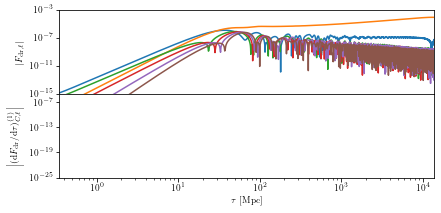

In [9]:
def runningMean(tau, y, tau_period):
    y_out = []
    for idx_tau, t in enumerate(tau):
        tau_next_idx = np.argmin(np.abs(t + tau_period - tau))
        y_out.append(np.sum(y[idx_tau:tau_next_idx])/(tau_next_idx - idx_tau))
    return y_out
period = 2*2*np.pi/k_plot

pert = dwdm.get_perturbations()['scalar'][0]
fig, ax = plt.subplots(2, 1, figsize=[width, 1.5*height])
ax[0].set(xscale='log', yscale='log', ylabel=r'$|F_{\mathrm{dr},\ell}|$')
l_max_plot_dr = 6
for l in range(l_max_plot_dr):
#    F = runningMean(pert['tau [Mpc]'], np.abs(pert[f'F_dr[0][{l}]']), period)
    ax[0].plot(pert['tau [Mpc]'], np.abs(pert[f'F_dr[0][{l}]']), label=r'$l=$'+str(l))
ax[0].set_ylim([1e-15, 1e-3])
ax[0].set_xlim([min(pert['tau [Mpc]']), max(pert['tau [Mpc]'])])
#for l in range(l_max_plot_dr):
#    ax[1].plot(pert['tau [Mpc]'], np.abs(pert[f'col_dr[{l}]']), label=r'$l=$'+str(l))
ax[1].set_xlim([min(pert['tau [Mpc]']), max(pert['tau [Mpc]'])])
ax[1].set(xscale='log', yscale='log', xlabel=r'$\tau$ [Mpc]', ylabel=r'$\left| (\mathrm{d}F_{\mathrm{dr}}/\mathrm{d}\tau)_{C,\ell}^{(1)} \right|$')
ax[1].set(ylim=[1e-25, 1e-5])
ax[1].legend(frameon=False)
fig.subplots_adjust(wspace=0.2, hspace=0, left=0.12, right=0.975, bottom=0.125, top=0.9)
# fig.savefig('fig6_fdr.pdf')

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/808441574.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(3,1, figsize=[width, 2*height], gridspec_kw={'height_ratios':[2, 1, 1]})


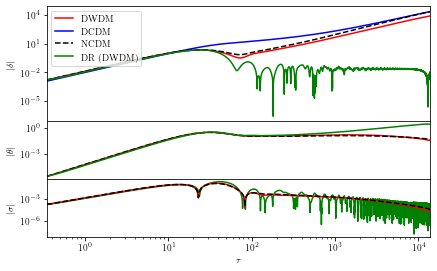

In [10]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax = plt.subplots(3,1, figsize=[width, 2*height], gridspec_kw={'height_ratios':[2, 1, 1]})
#ax[0].set_title(f'Decaying NCDM perturbations at k={k_plot}/Mpc')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$|\delta|$')

pert = dwdm.get_perturbations()['scalar'][0]
ax[0].plot(pert['tau [Mpc]'], np.abs(pert['delta_ncdm[0]']), 'r-', label=f"DWDM")
ax[1].plot(pert['tau [Mpc]'], np.abs(pert['theta_ncdm[0]']), 'r-')
ax[2].plot(pert['tau [Mpc]'], np.abs(pert['shear_dr[0]']), 'g-')
ax[2].plot(pert['tau [Mpc]'], np.abs(pert['shear_ncdm[0]']), 'r-')

pert = dcdm.get_perturbations()['scalar'][0]
ax[0].plot(pert['tau [Mpc]'], np.abs(pert['delta_dcdm']), 'b-', label=f"DCDM")

pert = ncdm.get_perturbations()['scalar'][0]
ax[0].plot(pert['tau [Mpc]'], np.abs(pert['delta_ncdm[0]']), 'k--', label=f"NCDM")
ax[1].plot(pert['tau [Mpc]'], np.abs(pert['theta_ncdm[0]']), 'k--')
ax[2].plot(pert['tau [Mpc]'], np.abs(pert['shear_ncdm[0]']), 'k--')

pert = dwdm.get_perturbations()['scalar'][0]
ax[0].plot(pert['tau [Mpc]'], np.abs(pert['delta_dr[0]']), 'g-', label=f"DR (DWDM)")
ax[1].plot(pert['tau [Mpc]'], np.abs(pert['theta_dr[0]']), 'g-')

ax[0].set(xlim=[min(pert['tau [Mpc]']), max(pert['tau [Mpc]'])])
ax[1].set(xlim=[min(pert['tau [Mpc]']), max(pert['tau [Mpc]'])])
ax[2].set(xlim=[min(pert['tau [Mpc]']), max(pert['tau [Mpc]'])])
ax[0].legend(frameon=True, loc='upper left')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$|\theta|$')
#ax[1].legend(frameon=False)
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_ylabel(r'$|\sigma|$')
ax[2].set_xlabel(r'$\tau$')
#ax[2].legend(frameon=False)

fig.subplots_adjust(wspace=0.2, hspace=0, left=0.1, right=0.975, bottom=0.10, top=0.9)
# fig.savefig('fig5_deltas.pdf')

In [11]:
trigger = 32
fluid = Class(LCDM_settings | basic | dncdm_basic | {'ncdm_fluid_approximation':2, 'ncdm_fluid_trigger_tau_over_tau_k':trigger}).compute()
tau_fluid = fluid.get_perturbations()['scalar'][0]['tau [Mpc]']
trigger_id = np.argmin(np.abs(trigger - k_plot*tau_fluid))

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/3286601340.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(2,1, figsize=[width, 1.5*height], gridspec_kw={'height_ratios':[2, 1]})


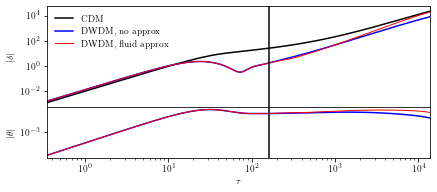

In [12]:
fig, ax = plt.subplots(2,1, figsize=[width, 1.5*height], gridspec_kw={'height_ratios':[2, 1]})
# ax[0].set_title(f'Fluid approx. comparison at k={k_plot}/Mpc')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$|\delta|$')
ax[0].set_xlim(min(pert['tau [Mpc]']), max(pert['tau [Mpc]']))
pert = dwdm.get_perturbations()['scalar'][0]
ax[0].plot(pert['tau [Mpc]'], np.abs(pert['delta_cdm']), 'k-', label='CDM')
# ax[0].set_xlabel(r'$k \tau$')
for idx, clas in enumerate([dwdm, fluid]):
    pert = clas.get_perturbations()['scalar'][0]
    label = "no approx" if idx == 0 else "fluid approx"
    col = 'b' if idx == 0 else 'r'
    lwi = 1.5 if idx == 0 else 1.0
    ax[0].plot(pert['tau [Mpc]'], np.abs(pert['delta_ncdm[0]']), '-', color=col, lw=lwi, label=f"DWDM, "+label)
    ax[1].plot(pert['tau [Mpc]'], np.abs(pert['theta_ncdm[0]']), '-', color=col, lw=lwi, label=f"DWDM, "+label)
#    ax[0].plot(pert['tau [Mpc]'], np.abs(pert['delta_dr[0]']), '-', label=f"DR, "+label)
#    ax[1].plot(pert['tau [Mpc]'], np.abs(pert['theta_dr[0]']), '-', label=f"DR, "+label)
ax[0].axvline(x=tau_fluid[trigger_id], color='k', linestyle='-')
ax[1].axvline(x=tau_fluid[trigger_id], color='k', linestyle='-')
ax[0].legend(frameon=False)
ax[1].set_xscale('log')
ax[1].set_xlim(min(pert['tau [Mpc]']), max(pert['tau [Mpc]']))
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$|\theta|$')
ax[1].set_xlabel(r'$\tau$')

fig.subplots_adjust(wspace=0.2, hspace=0, left=0.1, right=0.975, bottom=0.2, top=0.9)
# fig.savefig('figC_fluid.pdf')

### CMB Spectrum

In [13]:
if 'H0' in LCDM_settings:
    del LCDM_settings['H0']
LCDM_settings['100*theta_s'] = 1.042143
LCDM_settings['lensing'] = 'yes'
basic['ur_fluid_approximation'] = 3
basic['radiation_streaming_approximation'] = 3

Gamma = 1e+8
dncdm_basic = {
    'omega_dncdmdr'     : omega_dncdmdr,
    'N_ncdm_decay_dr'   : 1,
    'quadrature_strategy_ncdm_decay_dr': 3,
    'maximum_q_ncdm_decay_dr'          : 15,
    'N_momentum_bins_ncdm_decay_dr'    : 20,
    'l_max_dr'                         : 17,
    'l_max_ncdm'                       : 17, # default
    'ncdm_fluid_approximation'         : 3,
    'm_ncdm_decay_dr':10.0,
    'Gamma_ncdm_decay_dr':Gamma
}

lcdm = Class(LCDM_settings | basic).compute()
dwdm = Class(LCDM_settings | basic | dncdm_basic).compute()
dcdm = Class(LCDM_settings | basic | {'omega_ini_dcdm':0.0256, 'Gamma_dcdm':Gamma}).compute()
neff = Class(LCDM_settings | basic | {'N_eff':3.546}).compute()

In [14]:
def get_spectrum(class_instance, typee='tt', lensing=True):
    if lensing:
        cls  = class_instance.lensed_cl(2500)
    else:
        cls  = class_instance.raw_cl(2500)
    ll   = cls['ell'][2:]
    clTT = cls[typee][2:]
    cl   = clTT*ll*(ll+1)/2./np.pi
    return ll, cl

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/4165073921.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(2,1, figsize=[width, 1.5*height], gridspec_kw={'height_ratios':[1, 1]})
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/4165073921.py:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax[0].set_yscale('linear')
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/4165073921.py:42: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax[1].set_yscale('linear')
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/4165073921.py:50: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax[i].set_xscale('linear')


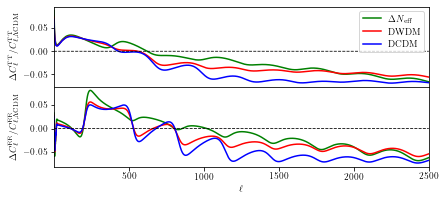

In [17]:
plot_ncdm = False

fig, ax = plt.subplots(2,1, figsize=[width, 1.5*height], gridspec_kw={'height_ratios':[1, 1]})
#fig, ax = plt.subplots(3,1, figsize=[width, 2.5*height])
ll_lcdm, cl_lcdm = get_spectrum(lcdm)
pert = neff
ll, cl = get_spectrum(pert)
ax[0].plot(ll, (cl - cl_lcdm)/cl_lcdm, 'g-', label="$\Delta N_{\mathrm{eff}}$")
pert = dwdm
ll, cl = get_spectrum(pert)
ax[0].plot(ll, (cl - cl_lcdm)/cl_lcdm, 'r-', label=f"DWDM")
if plot_ncdm:
    pert = ncdm
    ll, cl = get_spectrum(pert)
    ax[0].plot(ll, (cl - cl_lcdm)/cl_lcdm, 'k--', label=f"NCDM")
pert = dcdm
ll, cl = get_spectrum(pert)
ax[0].plot(ll, (cl - cl_lcdm)/cl_lcdm, 'b-', label=f"DCDM")
ax[0].set_ylabel(r'$\Delta C_{\ell}^{\mathrm{TT}}/C_{\ell,\Lambda\mathrm{CDM}}^{\mathrm{TT}}$')
ax[0].set_xscale('log')
ax[0].set_yscale('linear')
ax[0].set_xlim(2,2500)
#ax[0].set_ylim(-0.08,0.10)
ax[0].plot(ll_lcdm, np.zeros(len(ll_lcdm)), 'k--', lw=0.8)
ax[0].legend(frameon=True, loc='upper right')
ll_lcdm, cl_lcdm = get_spectrum(lcdm, typee='ee')
pert = neff
ll, cl = get_spectrum(pert, typee='ee')
ax[1].plot(ll, (cl - cl_lcdm)/cl_lcdm, 'g-', label="$\Delta N_{\mathrm{eff}}$")
pert = dwdm
ll, cl = get_spectrum(pert, typee='ee')
ax[1].plot(ll, (cl - cl_lcdm)/cl_lcdm, 'r-', label=f"DWDM")
if plot_ncdm:
    pert = ncdm
    ll, cl = get_spectrum(pert, typee='ee')
    ax[1].plot(ll, (cl - cl_lcdm)/cl_lcdm, 'k--', label=f"NCDM")
pert = dcdm
ll, cl = get_spectrum(pert, typee='ee')
ax[1].plot(ll, (cl - cl_lcdm)/cl_lcdm, 'b-', label=f"DCDM")
ax[1].set_ylabel(r'$\Delta C_{\ell}^{\mathrm{EE}}/C_{\ell,\Lambda\mathrm{CDM}}^{\mathrm{EE}}$')
ax[1].set_xscale('log')
ax[1].set_yscale('linear')
ax[1].set_xlim(2,2500)
ax[1].plot(ll_lcdm, np.zeros(len(ll_lcdm)), 'k--', lw=0.8)
ax[1].set_xlabel(r'$\ell$')
for i in [0]:
    ax[i].get_xaxis().set_visible(False)
    
for i in [0, 1]:
    ax[i].set_xscale('linear')

fig.subplots_adjust(wspace=0.2, hspace=0, left=0.12, right=0.975, bottom=0.16, top=0.9)
# fig.savefig('fig7_cmb.pdf')

### Matter power spectrum

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/504957274.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1,1, figsize=[width, height])
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_92792/504957274.py:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax.set_yscale('linear')


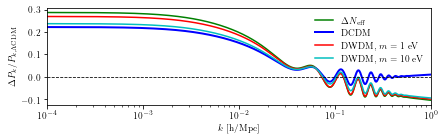

In [16]:
# Matter power spectrum
dwdm1 = Class(LCDM_settings | basic | dncdm_basic | {'m_ncdm_decay_dr':1.0}).compute()
kk = np.logspace(-4,np.log10(k_max),1000) # k in h/Mpc
pk = []

fig, ax = plt.subplots(1,1, figsize=[width, height])
pk_lcdm = np.array([lcdm.pk(k*lcdm.h(), 0.)*lcdm.h()**3 for k in kk])
ax.set_ylabel(r'$\Delta P_k/P_{k,\Lambda\mathrm{CDM}}$')
ax.set_xlabel(r'$k$ [h/Mpc]')
ax.set_xscale('log')
ax.set_yscale('linear')
pk = np.array([neff.pk(k*neff.h(), 0.)*neff.h()**3 for k in kk])
ax.plot(kk, (pk - pk_lcdm)/pk_lcdm, 'g-', label='$\Delta N_{\mathrm{eff}}$')

pk = np.array([dcdm.pk(k*dcdm.h(), 0.)*dcdm.h()**3 for k in kk])
ax.plot(kk, (pk - pk_lcdm)/pk_lcdm, 'b-', lw=2, label='DCDM')
pk = np.array([dwdm1.pk(k*dwdm1.h(), 0.)*dwdm1.h()**3 for k in kk])
ax.plot(kk, (pk - pk_lcdm)/pk_lcdm, 'r-', label='DWDM, $m=1$ eV')
pk = np.array([dwdm.pk(k*dwdm.h(), 0.)*dwdm.h()**3 for k in kk])
ax.plot(kk, (pk - pk_lcdm)/pk_lcdm, 'c-', label='DWDM, $m=10$ eV')
#pk = np.array([ncdm.pk(k*ncdm.h(), 0.)*ncdm.h()**3 for k in kk])
#ax.plot(kk, (pk - pk_lcdm)/pk_lcdm, '-', label='NCDM')
ax.set_xlim(min(kk), max(kk))
ax.plot(kk, np.zeros(len(kk)), 'k--', lw=0.8)
ax.legend(frameon=False)

fig.subplots_adjust(wspace=0.2, hspace=0, left=0.1, right=0.975, bottom=0.23, top=0.9)
# fig.savefig('fig8_powerspec.pdf')

Figures for this section were made with separate MontePython-based plotting scripts